# Описание проекта
В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.
Ваша задача — выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.
О каждой квартире в базе содержится два типа данных: добавленные пользователем и картографические. Например, к первому типу относятся площадь квартиры, её этаж и количество балконов, ко второму — расстояния до центра города, аэропорта и ближайшего парка. 

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — общая площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

# Шаг 1. Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


Импортируем, но нельзя выкладывать файлы из Яндекс Практикума.

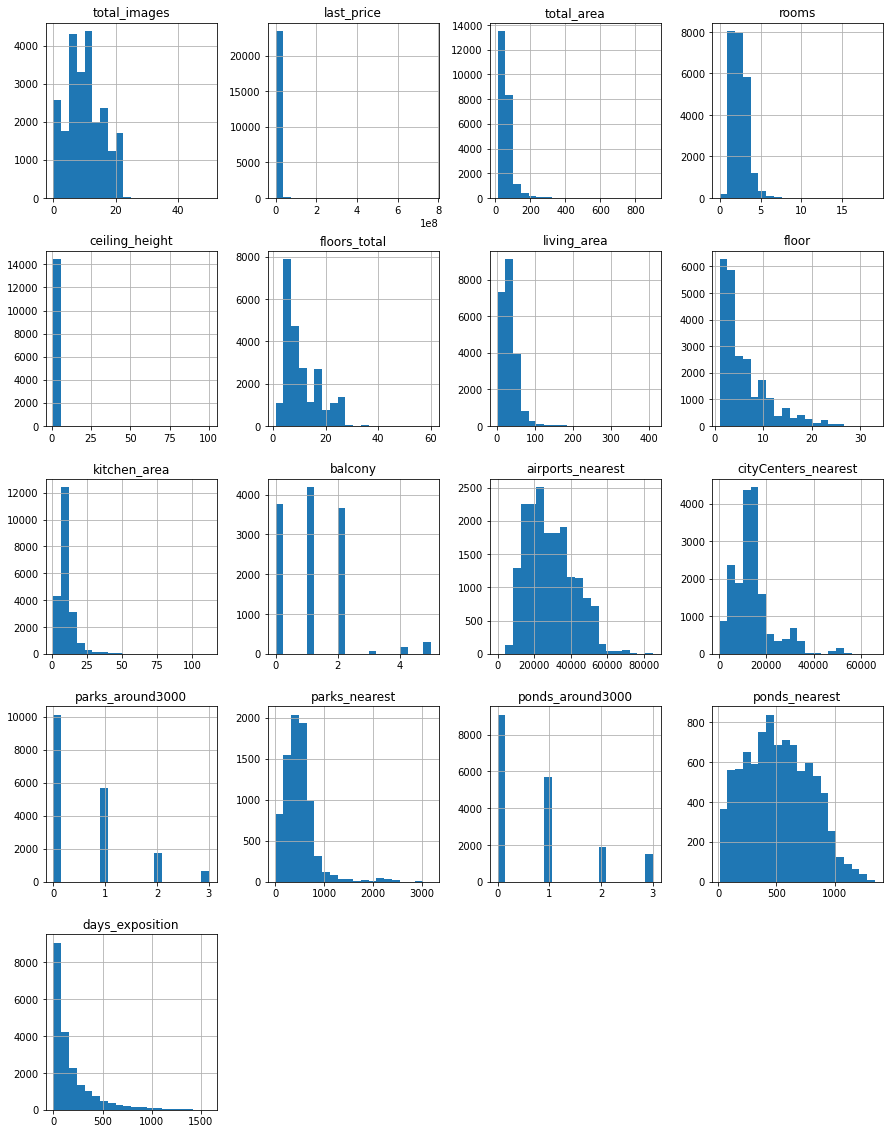

In [2]:
data.hist(bins=20,figsize=(15,20))
plt.show()

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
pd.set_option('display.max_columns', None)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


# Шаг 2. Предобработка данных

# 2.1 Найдите и изучите пропущенные значения в столбцах:

In [5]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Первый столбец с пропусками: ceiling_height, получим информацию о нём.

In [6]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [7]:
data_ceiling_height_median = data['ceiling_height'].median()

Мы не можем удалить строки с нулевыми значениями, т.к. их слишком много. Значения имеют тип float, будем заменять пропущенные значения на медиану.

In [8]:
data['ceiling_height'] = data['ceiling_height'].fillna(value=data_ceiling_height_median)
data['ceiling_height'].isna().sum()

0

Идём дальше, следующий столбец floors_total, тип float, 86 пропусков

In [9]:
data[data['floors_total'].isna()].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.0,65.20,2018-10-02T00:00:00,2,2.65,NaN,30.80,4,NaN,False,False,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.10,2016-11-23T00:00:00,1,2.65,NaN,20.75,1,NaN,False,False,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.80,2015-08-01T00:00:00,2,2.65,NaN,38.40,12,NaN,False,False,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.60,2017-04-06T00:00:00,3,2.65,NaN,47.10,8,NaN,False,False,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.00,2017-04-22T00:00:00,1,2.65,NaN,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
1930,1,9750000.0,66.77,2016-05-13T00:00:00,2,2.65,NaN,NaN,4,NaN,False,False,NaN,0.0,Санкт-Петербург,39886.0,10660.0,1.0,2276.0,3.0,244.0,90.0
2392,7,5395770.0,53.00,2017-06-29T00:00:00,2,2.65,NaN,29.00,22,NaN,False,False,9.00,0.0,Санкт-Петербург,43074.0,10820.0,0.0,NaN,0.0,NaN,48.0
2846,4,2325000.0,27.80,2016-09-21T00:00:00,1,2.65,NaN,19.40,15,NaN,False,False,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,307.0
2952,10,6500000.0,54.30,2019-04-23T00:00:00,1,2.65,NaN,22.20,6,NaN,False,False,12.30,NaN,Санкт-Петербург,23606.0,3148.0,0.0,NaN,0.0,NaN,NaN
3031,9,6400000.0,56.70,2018-03-27T00:00:00,2,2.65,NaN,32.00,12,NaN,False,False,12.00,NaN,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,231.0


Не придумал на что заменить пропуски, так что удалим строки с пропусками в этом столбце

In [10]:
data = data.dropna(subset=['floors_total']).reset_index(drop=True)
data['floors_total'].isna().sum()

0

In [11]:
for i in data['rooms'].unique():
    data.loc[(data['rooms'] == i) & (data['living_area'].isna()), 'living_area'] = \
    data.loc[(data['rooms'] == i), 'living_area'].median()
    
data['living_area'] = round(data['living_area'],1)
data['living_area'].isnull().sum()

0

Скорее всего пропуск is_apartment означает, что квартира не является апартаментами. 

In [12]:
data['is_apartment'] = data['is_apartment'].fillna(value=False)
data['is_apartment'].isna().sum()

0

Балконы: Например, если продавец не указал число балконов, то, скорее всего, в его квартире их нет. Такие пропуски правильно заменить на 0.

In [13]:
data['balcony'] = data['balcony'].fillna(value=0)
data['balcony'].isna().sum()

0

In [14]:

for i in data['rooms'].unique():
    data.loc[(data['rooms'] == i) & (data['kitchen_area'].isna()), 'kitchen_area'] = \
    data.loc[(data['rooms'] == i), 'kitchen_area'].median()

data['kitchen_area'] = round(data['kitchen_area'],1)
data['kitchen_area'].isna().sum()

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


194

In [15]:
len(data[data['rooms']==0])

194

In [16]:
data.query('rooms == 0')
# Заметил, что в квартирах с rooms = 0, стоит значение True в одном из двух столбцов: open_plan или studio, проверим это

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30T00:00:00,0,2.65,24.0,15.5,2,False,True,False,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
347,4,2320000.0,25.00,2017-09-27T00:00:00,0,2.65,14.0,17.0,1,False,False,True,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
438,8,2480000.0,27.11,2018-03-12T00:00:00,0,2.65,17.0,24.8,4,False,True,False,NaN,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
505,0,3375000.0,34.40,2017-03-28T00:00:00,0,2.65,26.0,24.3,19,False,False,True,NaN,1.0,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
605,2,1850000.0,25.00,2019-02-20T00:00:00,0,2.65,10.0,18.0,7,False,True,False,NaN,0.0,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23126,7,3200000.0,26.00,2017-09-01T00:00:00,0,2.65,25.0,18.0,16,False,True,False,NaN,0.0,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0
23358,0,2500000.0,27.70,2017-09-28T00:00:00,0,2.65,24.0,18.0,4,False,False,True,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,4.0
23470,15,3350000.0,26.00,2018-09-07T00:00:00,0,2.65,19.0,18.0,8,False,True,False,NaN,0.0,Санкт-Петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0
23507,10,1450000.0,29.00,2017-11-11T00:00:00,0,2.65,9.0,18.0,8,False,False,True,NaN,2.0,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,82.0


In [17]:
len(data[(data['rooms']==0) & ((data['studio']==True) | (data['open_plan']==True))])
# Количество строк сошлось. Предположу, что в этих случаях значение NaN в столбце 'kitchen_area' не указано осознанно, 
# что связано с типом квартиры (студия или свободная планировка). Площадь кухни не определена.(или пока не определена)
# Но поскольку 194 из 24000 составляет меньше 1%, удалю эти строки. Можно было бы заменить на -1, но их слишком мало,
# роли не сыграет.

194

In [18]:
data.loc[(data['rooms'] == 0) & ((data['studio'] == True) | (data['open_plan'] == True)), 'kitchen_area'] = -1

data = data.loc[~(data['kitchen_area'] == -1)]

In [19]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              48
airports_nearest         5455
cityCenters_nearest      5432
parks_around3000         5431
parks_nearest           15402
ponds_around3000         5431
ponds_nearest           14426
days_exposition          3158
dtype: int64

Удаляем строки, где пропущены значения в столбце 'locality_name', т.к. восстановить/ заменить не сможем

In [20]:
data = data.dropna(subset=['locality_name']).reset_index(drop=True)

In [21]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5447
cityCenters_nearest      5424
parks_around3000         5423
parks_nearest           15369
ponds_around3000         5423
ponds_nearest           14403
days_exposition          3157
dtype: int64

<div class="alert alert-info">

Теперь у нас остались столбцы с картографическими данными. Там очень много пропусков. Надо как-то решить удалять эти строки, или чем-нибудь заменять. Можно сгруппировать по locality_name, посмотреть процент пропусков. Если в городе А количество пропусков > 10 % от общего количества объявлений в городе, то удаляем город (Заменить нельзя, допустим в городе 200 объявлений, окажется, что пропусков 90%, в таком случае нельзя будет заменять значения на медиану/среднее).

Смотрим на столбцы airports_nearest , cityCenters_nearest, parks_nearest, которые важны для исследования.
    </div>

<div class="alert alert-info">
    Прямо тут избавлюсь от неявных дубликатов заменой ё на е в столбце 'locality_name',т.к. ниже группирую по нему. (Из пункта 2.4)
</div>

In [22]:
data['locality_name'] = [_.replace("ё", "е", 1) for _ in data['locality_name']]
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,False,False,False,11.0,2.0,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.65,14.0,45.0,9,False,False,False,9.5,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23366,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,False,False,False,13.8,0.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23367,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.65,5.0,38.0,4,False,False,False,8.5,0.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23368,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.65,3.0,29.7,1,False,False,False,8.7,0.0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23369,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,30.5,12,False,False,False,23.3,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


<div class="alert alert-info">
    В прошлое ревью вместо двух markdown выше было: * Строки, где нет картографических данных (расстояние до аэропорта,центра,парка)удаляем, хоть они и составляют ~50% от общего количества. Пропуски в расстоянии до водоёма не трогаем, т.к. они не нужны нам в исследовании(может их вообще удалить?) *
</div>

Передаём в list_filter названия населённых объектов locality_name, которые не подходят нам

In [23]:
list_filter=[]
for row in data.groupby('locality_name'):
    row_row = row[1]
    total = len(row_row)
    null_airports = len(row_row.query('airports_nearest.isna()'))
    null_citycenter = len(row_row.query('cityCenters_nearest.isna()'))
    null_parks = len(row_row.query('parks_nearest.isna()'))
    null_ponds = len(row_row.query('ponds_nearest.isna()'))
    if null_airports / total > 0.10 and null_citycenter / total > 0.10 and null_parks / total > 0.10:
        list_filter.append(row[0])

In [24]:
data_filtered = data.loc[~data['locality_name'].isin(list_filter)]

In [25]:
data_filtered

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,False,False,False,11.0,2.0,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.65,14.0,45.0,9,False,False,False,9.5,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23362,3,5500000.0,52.00,2018-07-19T00:00:00,2,2.65,5.0,31.0,2,False,False,False,6.0,0.0,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0
23363,11,9470000.0,72.90,2016-10-13T00:00:00,2,2.75,25.0,40.3,7,False,False,False,10.6,1.0,Санкт-Петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,519.0
23365,9,4600000.0,62.40,2016-08-05T00:00:00,3,2.60,9.0,40.0,8,False,False,False,8.0,0.0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0
23366,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,False,False,False,13.8,0.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN


Остаётся 18000 строк, но в условии я указал, что не проходят лишь те, у которых во всех трёх столбцах пропусков больше 10%.
Количество пропусков в парках изначально было примерно 70%, надо думать что делать с парками.
Посмотрим на пропуски оставшихся городов.

In [26]:
df_cycle = []
for row in data_filtered.groupby('locality_name'):
    row_row = row[1]
    total = len(row_row)
    null_airports = len(row_row.query('airports_nearest.isna()'))
    null_citycenter = len(row_row.query('cityCenters_nearest.isna()'))
    null_parks = len(row_row.query('parks_nearest.isna()'))
    null_ponds = len(row_row.query('ponds_nearest.isna()'))
    df_cycle.append({'city':row[0],'airports':(null_airports / total),'cityCenter':(null_citycenter / total) \
                     ,'parks':(null_parks / total),'ponds':(null_ponds / total)})
    

In [27]:
df_null = pd.DataFrame(df_cycle)

In [28]:
df_null.round(2)

,city,airports,cityCenter,parks,ponds
0,Зеленогорск,0.00,0.00,0.33,0.25
1,Колпино,0.00,0.00,0.61,0.44
2,Красное Село,0.01,0.01,0.74,0.94
3,Кронштадт,0.01,0.01,0.09,0.09
4,Ломоносов,0.01,0.01,0.88,0.38
5,Павловск,0.00,0.00,0.32,0.11
6,Петергоф,0.00,0.00,0.29,0.42
7,Пушкин,0.00,0.00,0.43,0.52
8,Санкт-Петербург,0.01,0.00,0.54,0.49
9,Сестрорецк,0.00,0.00,0.61,0.26


Думаю, что выполнить поставленную задачу по изучению параметра расстояние до ближайшего парка нельзя. Удовлетворительный процент пропусков только у одного населенного пункта. Общий процент пропусков столбца parks_nearest = 10013/18015 ~ 60% Поэтому удалю весь столбец parks и parks_around3000.


In [29]:
data_filtered.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest           91
cityCenters_nearest        68
parks_around3000           67
parks_nearest           10013
ponds_around3000           67
ponds_nearest            9047
days_exposition          2336
dtype: int64

In [30]:
data_filtered = data_filtered.drop(columns=['parks_around3000','parks_nearest'])

In [31]:
data_filtered.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest          91
cityCenters_nearest       68
ponds_around3000          67
ponds_nearest           9047
days_exposition         2336
dtype: int64

Столбцы airports_nearest, cityCenters_nearest заполню медианой по groupby('locality_name')

In [32]:
for name in data_filtered['locality_name'].unique():
    median = data_filtered.loc[data_filtered['locality_name'] == name, 'airports_nearest'].median()
    data_filtered.loc[(data_filtered['locality_name'] == name) & (data_filtered['airports_nearest'].isna()), \
                      'airports_nearest'] = median
    

In [33]:
data_filtered.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest           0
cityCenters_nearest       68
ponds_around3000          67
ponds_nearest           9047
days_exposition         2336
dtype: int64

In [34]:
for name in data_filtered['locality_name'].unique():
    median = data_filtered.loc[data_filtered['locality_name'] == name, 'cityCenters_nearest'].median()
    data_filtered.loc[(data_filtered['locality_name'] == name) & (data_filtered['cityCenters_nearest'].isna()), \
                      'cityCenters_nearest'] = median

In [35]:
data_filtered.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest           0
cityCenters_nearest        0
ponds_around3000          67
ponds_nearest           9047
days_exposition         2336
dtype: int64

В столбце ponds_nearest много пропусков ~50 %, учитывая, что этот столбец не нужен нам для исследования, то удаляем его и ponds_around3000

In [36]:
data_filtered = data_filtered.drop(columns=['ponds_around3000','ponds_nearest'])

In [37]:
data_filtered.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest           0
cityCenters_nearest        0
days_exposition         2336
dtype: int64

In [38]:
data_filtered.query('days_exposition.isna()').head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,NaN
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,2.65,24.0,30.5,22,False,False,False,18.9,2.0,Санкт-Петербург,23982.0,11634.0,NaN
44,13,5350000.0,40.0,2018-11-18T00:00:00,1,2.65,22.0,17.6,3,False,False,False,9.0,1.0,Санкт-Петербург,30471.0,11603.0,NaN
45,17,5200000.0,50.6,2018-12-02T00:00:00,2,2.65,9.0,30.3,7,False,False,False,7.0,0.0,Санкт-Петербург,30011.0,12872.0,NaN
46,17,6600000.0,52.1,2019-01-31T00:00:00,2,2.60,24.0,29.7,9,False,False,False,8.3,2.0,Санкт-Петербург,15114.0,12702.0,NaN
49,1,3050000.0,30.8,2018-11-22T00:00:00,1,2.50,9.0,18.0,7,False,False,False,6.0,0.0,Санкт-Петербург,45341.0,16603.0,NaN
52,20,11795000.0,136.0,2017-09-22T00:00:00,6,3.00,2.0,94.0,2,False,False,False,11.0,1.0,Санкт-Петербург,16510.0,6582.0,NaN
71,20,4850000.0,57.5,2019-03-27T00:00:00,3,2.50,9.0,39.0,8,False,False,False,6.2,0.0,Санкт-Петербург,33623.0,12267.0,NaN
81,9,10949000.0,68.0,2018-12-27T00:00:00,1,2.65,10.0,17.6,6,False,False,False,9.0,0.0,Санкт-Петербург,26786.0,12226.5,NaN
87,19,4999000.0,52.0,2019-04-23T00:00:00,2,2.61,9.0,30.0,6,False,False,False,9.0,2.0,Санкт-Петербург,12444.0,15035.0,NaN


days_exposition — сколько дней было размещено объявление (от публикации до снятия)
Скорее всего пропуски значат, что квартиры ещё не были куплены.
Заменим на -1

<div class="alert alert-info">
    Код ниже до жёлтого комментария - новый. На данном этапе добавим столбец 'year_exposition'.
</div>

In [39]:
data_filtered['first_day_exposition'] = pd.to_datetime(data_filtered['first_day_exposition'], format='%Y.%m.%dT%H:%M:%S')

In [40]:
data_filtered['year_exposition'] = data_filtered['first_day_exposition'].dt.year

In [41]:
data_filtered.query('days_exposition.isna()').value_counts('year_exposition')

year_exposition
2019    1342
2018     669
2017     206
2015      58
2016      46
2014      15
dtype: int64

In [42]:
data_filtered['days_exposition'] = data_filtered['days_exposition'].fillna(-1)

In [43]:
data_filtered.isna().sum()

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
cityCenters_nearest     0
days_exposition         0
year_exposition         0
dtype: int64

<div class="alert alert-info">
    Думаю моё предположение по поводу пропусков days_exposition верно. </br>
    Чем меньше год, тем меньше пропусков.(см. две ячейки выше)</br>
    Тогда непонятно почему осталось ещё 15 квартир с 2014 года.
</div>

# 2.2 Рассмотрите типы данных в каждом столбце:

In [44]:
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18015 entries, 0 to 23369
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          18015 non-null  int64         
 1   last_price            18015 non-null  float64       
 2   total_area            18015 non-null  float64       
 3   first_day_exposition  18015 non-null  datetime64[ns]
 4   rooms                 18015 non-null  int64         
 5   ceiling_height        18015 non-null  float64       
 6   floors_total          18015 non-null  float64       
 7   living_area           18015 non-null  float64       
 8   floor                 18015 non-null  int64         
 9   is_apartment          18015 non-null  bool          
 10  studio                18015 non-null  bool          
 11  open_plan             18015 non-null  bool          
 12  kitchen_area          18015 non-null  float64       
 13  balcony         

Поменяем first_day_exposition с типа object на тип data
floors_total с типа float64 на int
balcony с типа float64 на int
days_exposition с типа float64 на int

In [45]:
data_filtered['first_day_exposition'] = pd.to_datetime(data_filtered['first_day_exposition'], format='%Y.%m.%dT%H:%M:%S')
data_filtered.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,days_exposition,year_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,-1.0,2019
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,False,False,11.0,2.0,поселок Шушары,12817.0,18603.0,81.0,2018
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,558.0,2015
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,45.0,9,False,False,False,9.5,0.0,Санкт-Петербург,28098.0,6800.0,424.0,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,121.0,2018


In [46]:
data_filtered['floors_total'] = data_filtered['floors_total'].astype('int')
data_filtered['balcony'] = data_filtered['balcony'].astype('int')
data_filtered['days_exposition'] = data_filtered['days_exposition'].astype('int')

In [47]:
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18015 entries, 0 to 23369
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          18015 non-null  int64         
 1   last_price            18015 non-null  float64       
 2   total_area            18015 non-null  float64       
 3   first_day_exposition  18015 non-null  datetime64[ns]
 4   rooms                 18015 non-null  int64         
 5   ceiling_height        18015 non-null  float64       
 6   floors_total          18015 non-null  int64         
 7   living_area           18015 non-null  float64       
 8   floor                 18015 non-null  int64         
 9   is_apartment          18015 non-null  bool          
 10  studio                18015 non-null  bool          
 11  open_plan             18015 non-null  bool          
 12  kitchen_area          18015 non-null  float64       
 13  balcony         

In [48]:
data_filtered.reset_index(drop=True,inplace=True)
data_filtered.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,days_exposition,year_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,-1,2019
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.0,2,поселок Шушары,12817.0,18603.0,81,2018
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,558,2015
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,45.0,9,False,False,False,9.5,0,Санкт-Петербург,28098.0,6800.0,424,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,121,2018


# 2.3 Найдите и устраните редкие и выбивающиеся значения. 

In [49]:
data_filtered['ceiling_height'].sort_values(ascending=False).head(20)

17395    100.0
16988     32.0
16259     27.5
4429      27.0
13635     27.0
15593     27.0
4323      26.0
7142      25.0
3547      25.0
4757      25.0
14155     25.0
3866      24.0
15619     22.6
13365     20.0
11492     14.0
16962     10.3
4469       8.3
13321      8.0
12002      8.0
15437      6.0
Name: ceiling_height, dtype: float64

Например, в столбце ceiling_height может быть указана высота потолков 25 м и 32 м. Логично предположить, что на самом деле это вещественные значения: 2.5 м и 3.2 м.

In [50]:
len(data_filtered)

18015

In [51]:
data_filtered.loc[data_filtered['ceiling_height'] >= 22.6,'ceiling_height'] = \
data_filtered.loc[data_filtered['ceiling_height'] >= 22.6,'ceiling_height'] / 10

In [52]:
data_filtered['ceiling_height'].sort_values(ascending=False).head(20)

13365    20.00
11492    14.00
16962    10.30
17395    10.00
4469      8.30
12002     8.00
13321     8.00
15437     6.00
1078      5.60
5795      5.50
9606      5.30
795       5.30
354       5.20
16659     4.90
2133      4.80
14604     4.70
1010      4.70
9448      4.65
10067     4.50
7455      4.50
Name: ceiling_height, dtype: float64

In [53]:
data_filtered = data_filtered.loc[(data_filtered['ceiling_height'] < 6)]
data_filtered.reset_index(drop=True,inplace=True)

In [54]:
len(data_filtered)

18007

In [55]:
data_filtered = data_filtered.query('ceiling_height >= 2.5')

<div class="alert alert-info">
    Смотрим ниже, где есть сильная разница между средним и медианой. Там и будем искать и избавляться от аномалий.
</div>

In [57]:
data_filtered.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,17963.0,1.007582e+01,5.741367e+00,0.0,6.0,10.00,14.00,50.0
last_price,17963.0,7.625286e+06,1.222624e+07,12190.0,4000000.0,5300000.00,7700000.00,763000000.0
total_area,17963.0,6.366069e+01,3.894791e+01,12.0,41.5,54.30,73.20,900.0
rooms,17963.0,2.154317e+00,1.115535e+00,1.0,1.0,2.00,3.00,19.0
ceiling_height,17963.0,2.714022e+00,2.372013e-01,2.5,2.6,2.65,2.73,5.6
floors_total,17963.0,1.113706e+01,6.519508e+00,1.0,5.0,9.00,16.00,60.0
living_area,17963.0,3.610724e+01,2.361572e+01,2.0,19.0,30.80,44.00,409.7
floor,17963.0,6.106107e+00,4.920014e+00,1.0,3.0,5.00,8.00,33.0
kitchen_area,17963.0,1.084113e+01,6.144392e+00,1.3,7.4,9.40,12.00,112.0
balcony,17963.0,5.823081e-01,9.644343e-01,0.0,0.0,0.00,1.00,5.0


<div class="alert alert-info">
    Посмотрим на last_price, total_area,kitchen_area,living_area,days_exposition. Всё ниже до пункта 2.4 - новый код.
</div>

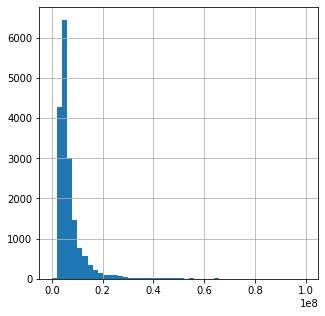

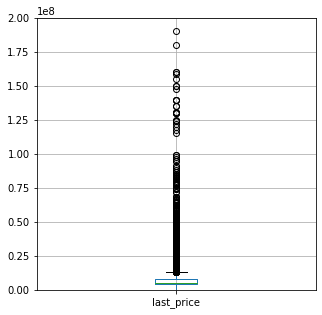

In [58]:
data_filtered['last_price'].hist(bins=50,range=(0,10e7),figsize=(5,5))
plt.show()
data_filtered.boxplot(column='last_price',figsize=(5,5))
plt.ylim(0,2e8)
plt.show()


In [59]:
data_filtered.sort_values('last_price').tail(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,days_exposition,year_exposition
11930,20,300000000.0,618.0,2017-12-18,7,3.40,7,258.0,5,False,False,False,70.0,0,Санкт-Петербург,32440.0,5297.0,111,2017
1115,19,330000000.0,190.0,2018-04-04,3,3.50,7,95.0,5,False,False,False,40.0,0,Санкт-Петербург,23011.0,1197.0,233,2018
11195,15,401300000.0,401.0,2016-02-20,5,2.65,9,204.0,9,False,False,False,24.0,3,Санкт-Петербург,21912.0,2389.0,393,2016
14892,8,420000000.0,900.0,2017-12-06,12,2.80,25,409.7,25,False,False,False,112.0,0,Санкт-Петербург,30706.0,7877.0,106,2017
9870,19,763000000.0,400.0,2017-09-30,7,2.65,10,250.0,10,False,False,False,20.0,2,Санкт-Петербург,25108.0,3956.0,33,2017


In [60]:
data_filtered.sort_values('last_price').head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,days_exposition,year_exposition
6691,7,12190.0,109.0,2019-03-20,2,2.75,25,32.0,25,False,False,False,40.5,0,Санкт-Петербург,36421.0,9176.0,8,2019
14964,5,1190000.0,14.0,2018-07-29,1,2.65,5,11.0,1,False,False,False,2.0,0,Санкт-Петербург,9898.0,11122.0,4,2018
3243,8,1200000.0,49.1,2018-10-21,4,2.50,5,36.9,1,False,False,False,5.2,0,Санкт-Петербург,17539.0,12313.0,44,2018
13709,3,1400000.0,13.0,2017-12-03,1,2.60,9,17.6,1,False,False,False,9.0,0,Санкт-Петербург,14350.0,15945.0,410,2017
12927,9,1550000.0,15.0,2018-08-21,1,2.70,9,17.6,1,False,False,False,9.0,0,Санкт-Петербург,51048.0,16376.0,42,2018


Даже среди выбросов на boxplot есть аномально большие значения. Удалим их. Ещё есть квартира стоимостью 12910, её тоже уберём. </br>
(Может вообще следует удалить всё за пределами 'усов'.)


In [61]:
data_filtered = data_filtered.query('last_price < 100000000')

In [62]:
data_filtered = data_filtered.query('last_price > 20000')

Заметил, что есть строки, где общая площадь меньше, чем сумма кухни и жилой площади. Убираем их!

In [63]:
data_filtered.query('total_area < (living_area + kitchen_area)')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,days_exposition,year_exposition
142,7,2600000.0,30.2,2018-02-14,1,2.65,9,26.1,5,False,False,False,6.2,0,Санкт-Петербург,13952.0,15031.0,12,2018
416,9,4700000.0,23.8,2018-12-28,1,2.65,18,20.0,9,False,False,False,5.0,0,Санкт-Петербург,9731.0,11849.0,108,2018
417,0,6000001.0,25.0,2018-11-16,1,3.00,5,17.6,5,False,False,False,9.0,0,Санкт-Петербург,25169.0,3871.0,17,2018
450,13,3500000.0,38.0,2017-07-10,2,2.65,9,30.5,8,False,False,False,8.7,0,Санкт-Петербург,11058.0,12575.0,3,2017
465,12,5600000.0,53.7,2017-04-18,2,2.50,12,48.3,5,False,False,False,7.0,2,Санкт-Петербург,50477.0,13252.0,167,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16792,6,2194000.0,36.5,2017-09-27,1,2.65,3,33.2,3,False,False,False,9.0,0,Санкт-Петербург,39446.0,18500.0,36,2017
16996,6,2050000.0,17.2,2019-01-13,1,2.77,23,17.6,1,False,False,False,9.0,0,Санкт-Петербург,33645.0,13513.0,7,2019
17224,6,3150000.0,24.0,2019-04-16,1,2.65,5,17.6,3,False,False,False,9.0,0,Санкт-Петербург,26737.0,5235.0,-1,2019
17558,0,5800000.0,66.0,2017-06-09,5,2.65,5,55.5,1,False,False,False,15.1,0,Санкт-Петербург,12007.0,11933.0,21,2017


In [64]:
data_filtered = data_filtered.query('~(total_area < (living_area + kitchen_area))')

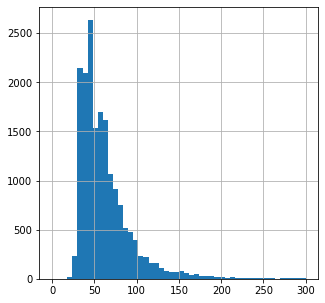

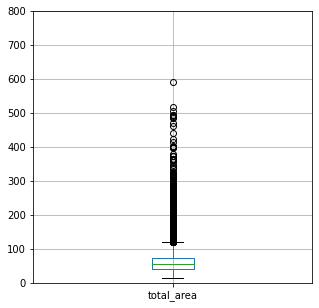

In [65]:
data_filtered['total_area'].hist(bins=50,range=(0,300),figsize=(5,5))
plt.show()
data_filtered.boxplot(column='total_area',figsize=(5,5))
plt.ylim(0,800)
plt.show()

Удаляем, где total_area > 500

In [66]:
data_filtered = data_filtered.query('total_area < 500')

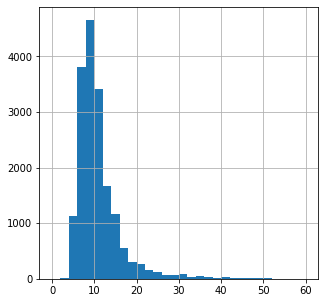

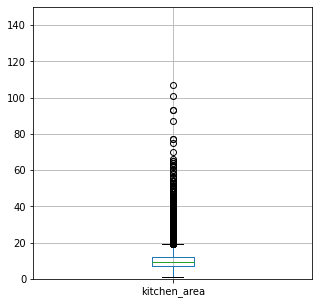

In [67]:
data_filtered['kitchen_area'].hist(bins=30,range=(0,60),figsize=(5,5))
plt.show()
data_filtered.boxplot(column='kitchen_area',figsize=(5,5))
plt.ylim(0,150)
plt.show()

Удаляем, где kitchen_area > 60

In [68]:
data_filtered = data_filtered.query('kitchen_area < 60')

In [69]:
len(data_filtered)

17739

Уберём строки, где площадь кухни меньше 5 м2 (Первая ссылка по запросу *минимальная площадь кухни* показывает 5 м2.)

In [70]:
data_filtered = data_filtered.query('kitchen_area > 5')

In [71]:
len(data_filtered)

17446

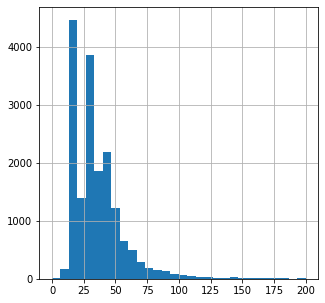

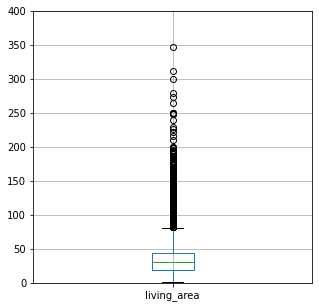

In [72]:
data_filtered['living_area'].hist(bins=30,range=(0,200),figsize=(5,5))
plt.show()
data_filtered.boxplot(column='living_area',figsize=(5,5))
plt.ylim(0,400)
plt.show()

Уберу площадь больше 220


In [73]:
data_filtered = data_filtered.query('living_area < 220')

In [74]:
data_filtered.sort_values('living_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,days_exposition,year_exposition
10592,20,6350000.0,52.0,2018-02-06,2,3.00,6,2.0,2,False,False,False,9.0,0,Санкт-Петербург,32453.0,6521.0,91,2018
2469,7,4440000.0,41.0,2017-07-02,1,2.65,17,3.0,17,False,False,False,11.0,0,Санкт-Петербург,19272.0,13073.0,216,2017
17914,14,64990000.0,139.0,2015-11-24,3,3.00,8,3.0,8,False,False,False,16.0,1,Санкт-Петербург,33255.0,5975.0,280,2015
16670,15,6100000.0,77.6,2019-02-28,4,2.50,9,5.4,1,False,False,False,9.8,0,Санкт-Петербург,29338.0,11270.0,33,2019
12523,13,3799000.0,31.0,2018-04-12,1,2.60,5,6.0,1,False,False,False,17.0,0,Санкт-Петербург,32177.0,4826.0,168,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10198,14,19500000.0,309.7,2016-02-03,9,2.65,5,199.0,5,False,False,False,14.3,0,Санкт-Петербург,10328.0,9987.0,468,2016
7796,10,25023000.0,253.7,2017-11-10,6,2.65,4,200.0,2,False,False,False,33.0,0,Санкт-Петербург,20687.0,1214.0,90,2017
17415,9,65000000.0,228.0,2016-06-02,4,2.65,5,200.0,2,False,False,False,11.0,0,Санкт-Петербург,22783.0,1295.0,-1,2016
16482,7,22160000.0,277.6,2017-08-19,7,3.80,6,211.0,3,False,False,False,17.8,0,Санкт-Петербург,25761.0,5671.0,22,2017


Великий Гугл сообщил, не менее 10 м2 на человека.

In [75]:
data_filtered = data_filtered.query('living_area > 10')

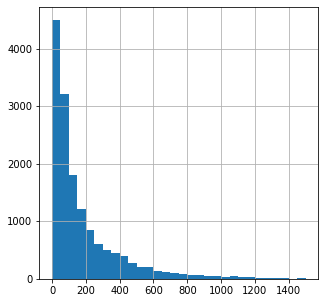

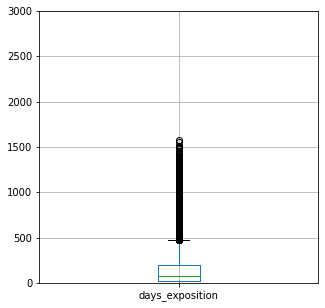

In [75]:
data_filtered['days_exposition'].hist(bins=30,range=(0,1500),figsize=(5,5))
plt.show()
data_filtered.boxplot(column='days_exposition',figsize=(5,5))
plt.ylim(0,3000)
plt.show()

Оставим всё так.

# 2.4 Изучите уникальные значения в столбце с названиями и устраните неявные дубликаты.

<div class="alert alert-info">
Ошибся с переменной, меняю на data_filtered
</div>

In [76]:
data_filtered.duplicated().sum()

0

Явных дубликатов нет.
Разобраться с неявными у меня не получилось. Я хотел поменять в столбце locality_name в строках слово 'поселок' на 'посёлок', но не получилось.

<div class="alert alert-info">
    Избавился от части явных дубликатов выше.
</div>

In [78]:
len(data_filtered)

<div class="alert alert-info"> 
    Провёл предобработку, осталось 17434 строк из 23699 начальных. </br>
    Было много пропусков, часть из них нельзя было заменять,пришлось удалять. </br>
    Было удалено 4 столбца parks,pounds,parks_3000,pounds_3000. </br>
    Поменял типы столбцов на более подходящие
</div>

# Шаг 3. Добавьте в таблицу новые столбцы со следующими параметрами:

Возникла проблема:

SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Строка ниже ещё решение. (с копированием)

In [79]:
data = data_filtered
data = data.copy()

In [80]:
data.info()

In [81]:
data['price_per_square_meter'] = (data['last_price'] / data['total_area']).round()
data['price_per_square_meter'] = data['price_per_square_meter'].astype(int)

In [82]:
data.sort_values('last_price').tail(20)

In [83]:
data['weekday_exposition'] = data['first_day_exposition'].dt.day_name()

In [84]:
dict_day_week = {'Monday':'Понедельник','Tuesday':'Вторник','Wednesday':'Среда','Thursday':'Четверг','Friday':'Пятница','Saturday':'Суббота','Sunday':'Воскресенье'}
data['weekday_exposition'] = data['weekday_exposition'].replace(to_replace=dict_day_week)
data['month_exposition'] = data['first_day_exposition'].dt.month

In [85]:
data.head()

In [86]:
def type_floor(row):
    floors_total = row['floors_total']
    floor = row['floor']
    
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другое'

Функция для определения типа этажа.

In [87]:
data = data.copy()
data

In [88]:
data['floor_type'] = data.apply(type_floor,axis=1)
data = data.copy()

In [89]:
data['cityCenters_km'] = (data['cityCenters_nearest'] / 1000).round()
data['cityCenters_km'] = data['cityCenters_km'].astype(int)
data = data.copy()

# Шаг 4. Проведите исследовательский анализ данных:

# total_area

In [90]:
data['total_area'].describe()

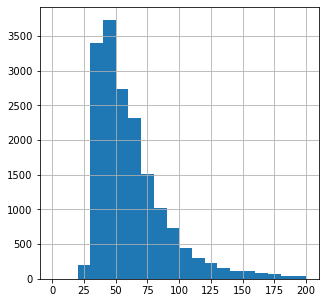

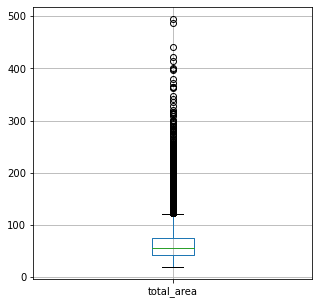

In [91]:
data['total_area'].hist(bins=20,range=(0,200),figsize=(5,5))
plt.show()
data.boxplot(column='total_area',figsize=(5,5))
plt.show()

Несколько значений > 600, большая часть квартир в диапазоне от 30 до 150 м2.

<div class="alert alert-info">
    Т.к. до этого я удалил значения > 600, диапазон: от 30 до 125 м2.
</div>

# living_area

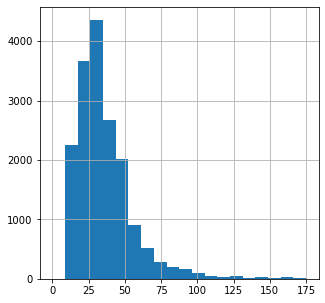

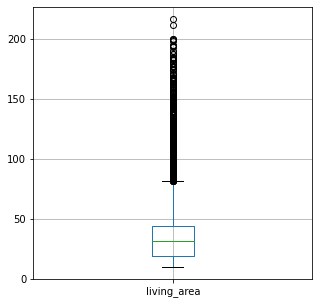

In [92]:
data['living_area'].hist(bins=20,range=(0,175),figsize=(5,5))
plt.show()
data.boxplot(column='living_area',figsize=(5,5))
plt.show()

<div class="alert alert-info"> 
    Основная часть лежит в диапазоне 15 - 80. Большое количество выбросов, они будто сливаются в прямую.
    
</div>


# kitchen_area

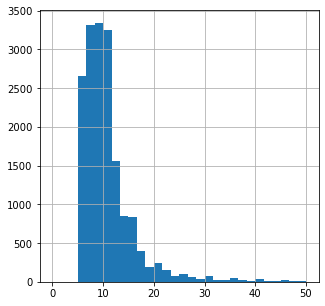

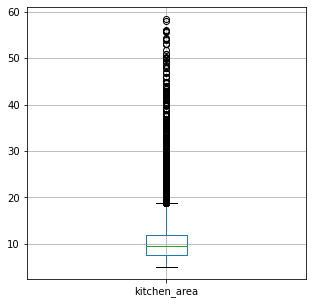

In [93]:
data['kitchen_area'].hist(bins=30,range=(0,50),figsize=(5,5))
plt.show()
data.boxplot(column='kitchen_area',figsize=(5,5))
plt.show()

<div class="alert alert-info"> 
    Основная часть между 5 и 18 м2.
</div>

# last_price

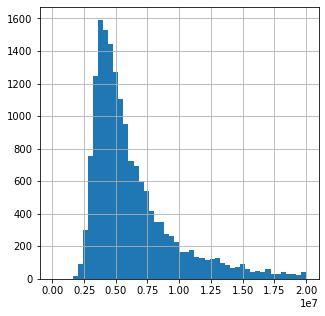

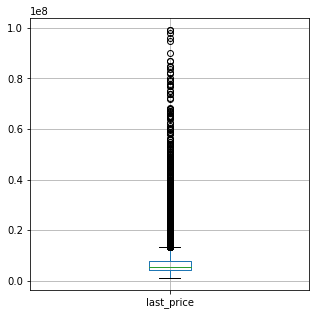

In [94]:
data['last_price'].hist(bins=50,range=(0,2e7),figsize=(5,5))
plt.show()
data.boxplot(column='last_price',figsize=(5,5))
plt.show()


Несколько огромных значений цен!

<div class="alert alert-info"> 
    ЧАще всего цены лежат в промежутке от 0.25 * e**7 до 0.125 * e**7. 
</div>

In [95]:
data['last_price'].describe().apply("{0:.5f}".format)

# rooms

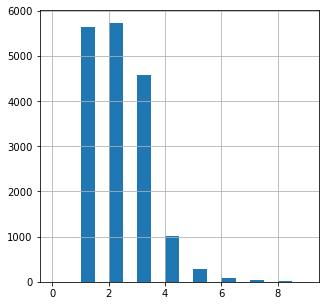

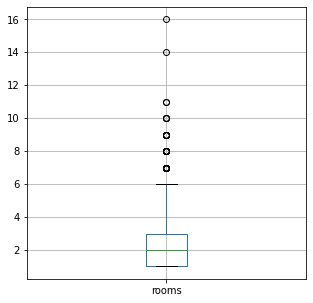

In [96]:
data['rooms'].hist(bins=18,range=(0,9),figsize=(5,5))
plt.show()
data.boxplot(column='rooms',figsize=(5,5))
plt.show()


Почти одинаковое количество однокомнатных и двухкомнатных квартир. Чуть меньше 3-комнатных.

# ceiling_height

In [97]:
data['ceiling_height'].describe()

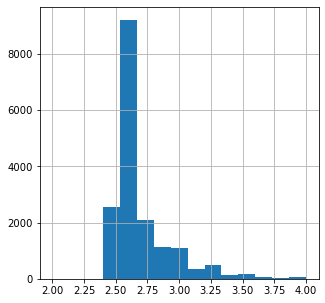

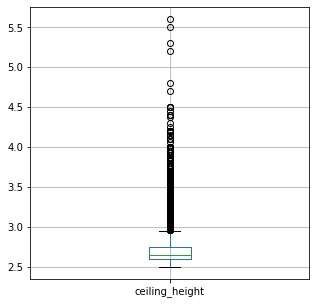

In [98]:
data['ceiling_height'].hist(bins=15,range=(2,4),figsize=(5,5))
plt.show()
data.boxplot(column='ceiling_height',figsize=(5,5))
plt.show()

<div class="alert alert-info"> 
    До этого я убрал значения больше 6 и меньше 2.5, основная часть находится между 2.5 и 2.9 
</div>

# floor

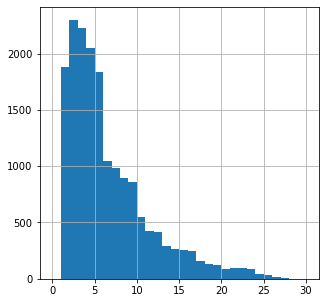

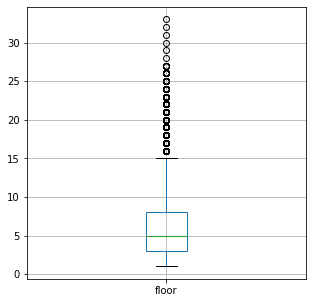

In [99]:
data['floor'].hist(bins=30,range=(0,30),figsize=(5,5))
plt.show()
data.boxplot(column='floor',figsize=(5,5))
plt.show()

<div class="alert alert-info">
    Чаще всего продаваемые квартиры находятся на 1 - 15 этажах.
</div>

# floor_type

In [100]:
data['floor_type'].value_counts()

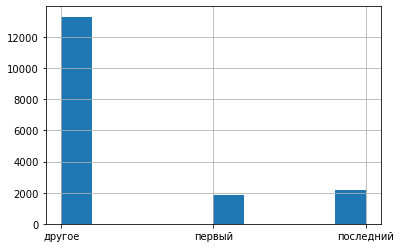

In [101]:
data['floor_type'].hist()
plt.show()

<div class="alert alert-info">
    На графике видно соотношение количества квартир в зависимости от типа этажа. </br>
    Примерно равное количество квартир на первом и на последнем этаже. </br>
    Большое количество других.
    
</div>

# floors_total

In [102]:
data['floors_total'].describe()

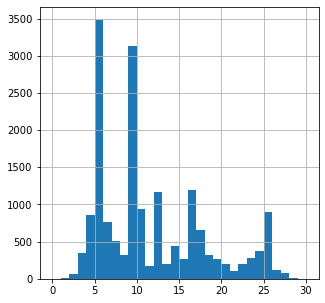

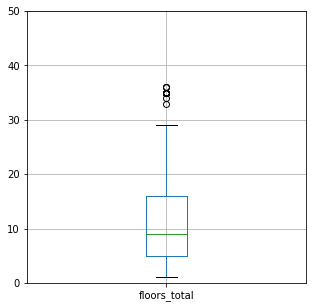

In [103]:
data['floors_total'].hist(bins=30,range=(0,30),figsize=(5,5))
plt.show()
data.boxplot(column='floors_total',figsize=(5,5))
plt.ylim(0,50)
plt.show()

In [104]:
data['floors_total'].value_counts().sort_index()

<div class="alert alert-info">
По value_counts видно, большое количество пятиэтажных, девятиэтажных зданий. </br>
Дома с высотой более 29 этажей - выбросы для нашей выборки.
</div>

# cityCenter_nearest

<code>
for i in data['locality_name'].unique():
    print(i)
    data.query('locality_name == @i')['cityCenters_nearest'].hist(bins=50,range=(0,0.55e5),figsize=(5,5))
    plt.show()
</code>

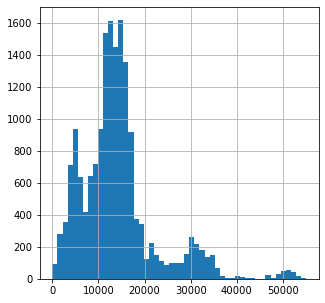

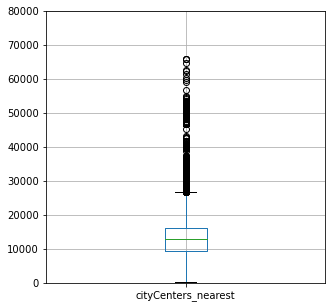

In [105]:
data['cityCenters_nearest'].hist(bins=50,range=(0,0.55e5),figsize=(5,5))
plt.show()
data.boxplot(column='cityCenters_nearest',figsize=(5,5))
plt.ylim(0,0.8e5)
plt.show()

<div class="alert alert-info">
Поскольку в нашей выборке большее число объявлений из Санкт-Петербурга, расстояние от удалённых населённых пунктов может находиться в выбросах.
</div>

# airports_nearest

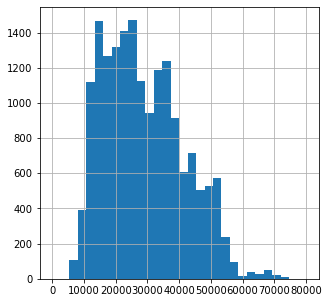

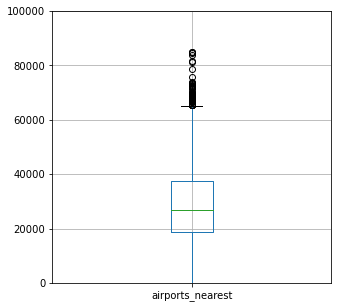

In [106]:
data['airports_nearest'].hist(bins=30,range=(0,0.8e5),figsize=(5,5))
plt.show()
data.boxplot(column='airports_nearest',figsize=(5,5))
plt.ylim(0,1e5)
plt.show()

In [107]:
data['airports_nearest'].describe()

# weekday_exposition

<div class="alert alert-info">
 Пункты ниже weekday_exposition и month_exposition новые.
</div>

In [108]:
special_for_weekday = data.groupby('weekday_exposition').agg({'last_price':'count'}).reset_index()

In [109]:
special_for_weekday.columns = ['day','count']

In [110]:
special_for_weekday['new'] = [7,2,1,5,3,6,4]

In [111]:
special_for_weekday = special_for_weekday.sort_values('new')

In [112]:
special_for_weekday = special_for_weekday.reset_index(drop=True)

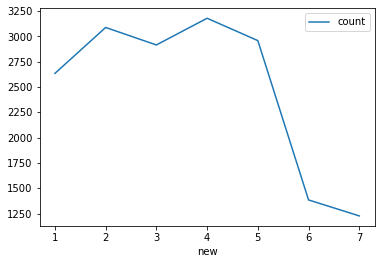

In [113]:
special_for_weekday.plot(x='new',y='count')
plt.show()

<div class="alert alert-info">
 На графике видно количество объявлений в зависимости от дня недели. Больше всего во вторник и четверг. Меньше всего в субботу и воскресенье.
</div>

# month_exposition 

In [114]:
special_for_month = data.groupby('month_exposition').agg({'last_price':'count'}).reset_index()

In [115]:
special_for_month

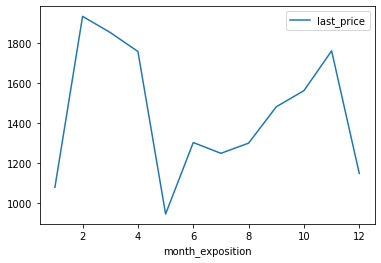

In [116]:
special_for_month.plot(x='month_exposition',y='last_price')
plt.show()

<div class="alert alert-info">
     Больше всего объявлений в феврале и в ноябре. Меньше всего в мае. Видимо сезонность.
</div>

Т.к. я предобработал данные, то на гистограммах меньше аномальных значений.
Все гистограммы выглядят правдоподно.

# 4.2 Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление.


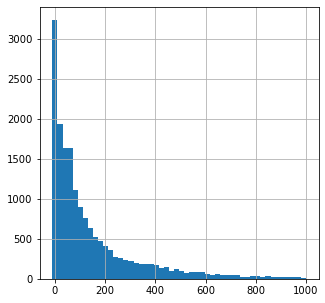

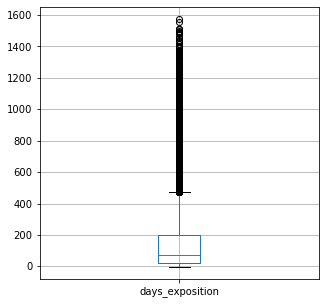

In [117]:
data['days_exposition'].hist(bins=50,range=(-10,1000),figsize=(5,5))
plt.show()
data.boxplot(column='days_exposition',figsize=(5,5))
plt.show()

In [118]:
data['days_exposition'].describe()

Пропуски в столбце days_exposition я заменял на -1, с мыслью, что объявление ещё висит.

Будем считать без этих строк.

In [119]:
data_days_exposition = data.query('days_exposition != -1')

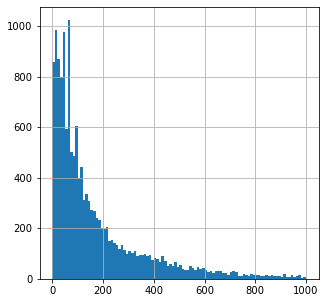

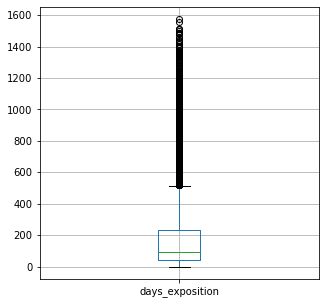

In [120]:
data_days_exposition['days_exposition'].hist(bins=100,range=(0,1000),figsize=(5,5))
plt.show()
data_days_exposition.boxplot(column='days_exposition',figsize=(5,5))
plt.show()

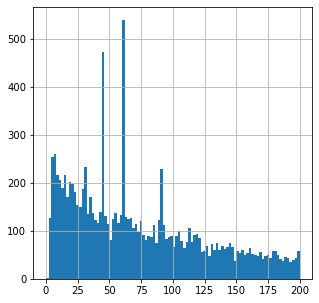

In [121]:
data_days_exposition['days_exposition'].hist(bins=100,range=(0,200),figsize=(5,5))
plt.show()

In [122]:
data_days_exposition['days_exposition'].describe()

Среднее время продажи = 183 дня, медиана = 96 дня. </br>
Неизвестные выбросы на диаграмме выше, при значениях около 40, 60, 85. </br>
Судя по диаграмме размаха, необычно долгое время продажи - более 500 дней, поскольку 'нижний ус' упирается в 0, то нельзя какие-то продажи считать быстрыми.

<div class="alert alert-info">
     Поскольку нет выбросов снизу от нижнего *уса*, много объявлений с таким количеством дней. </br>
     У меня нет опыта в продаже/покупке квартир, но если мыслить логически, то этот процесс должен занимать минимум недели 2-3, так что быстрыми продажами буду считать объявления, которые провисели менее 20 дней.
</div>

# 4.3 Какие факторы больше всего влияют на общую (полную) стоимость объекта?
Изучите, зависит ли цена от: </br>
общей площади;</br>
жилой площади;</br>
площади кухни;</br>
количества комнат;</br>
этажа, на котором расположена квартира (первый, последний, другой);</br>
даты размещения (день недели, месяц, год).</br>

# Общая площадь(total_area)

In [123]:
data['last_price'] = data['last_price'].astype(int)

In [124]:
total_pivot_table = data.pivot_table(index='total_area',values='last_price',aggfunc=['count','mean','median']).reset_index()
total_pivot_table.columns = ['total_area','count', 'mean', 'median']
total_pivot_table

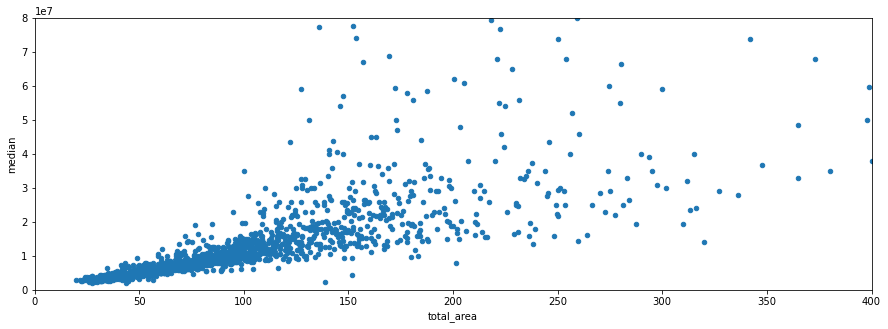

In [125]:
total_pivot_table.plot(x='total_area', y='median', kind='scatter',figsize=(15,5))
plt.xlim(0,400)
plt.ylim(0,0.8e8)
plt.show()

In [126]:
total_pivot_table['total_area'].corr(total_pivot_table['median'])

Коэф. корреляции = 0.7, зависимость заметная.
Чем больше площадь, тем больше общая стоимость.

# Жилая площадь

In [127]:
living_pivot_table = data.pivot_table(index='living_area',values='last_price',aggfunc=['count','mean','median']).reset_index()
living_pivot_table.columns = ['living_area','count', 'mean', 'median']
living_pivot_table

In [128]:
living_pivot_table['living_area'].corr(living_pivot_table['median'])

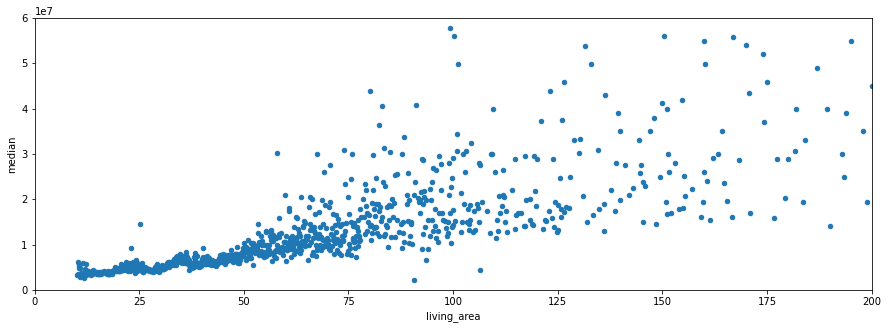

In [129]:
living_pivot_table.plot(x='living_area', y='median', kind='scatter',figsize=(15,5))
plt.xlim(0,200)
plt.ylim(0,6e7)
plt.show()

Чем больше жилая площадь, тем больше цена.
Коэф. корреляции = 0.63 заметная зависимость

# Площадь кухни

In [130]:
kitchen_pivot_table = data.pivot_table(index='kitchen_area',values='last_price',aggfunc=['count','mean','median']).reset_index()
kitchen_pivot_table.columns = ['kitchen_area','count', 'mean', 'median']
kitchen_pivot_table

In [131]:
kitchen_pivot_table['kitchen_area'].corr(kitchen_pivot_table['median'])

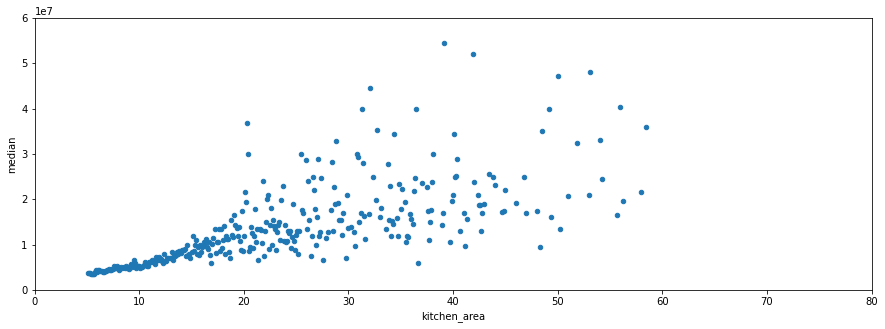

In [132]:
kitchen_pivot_table.plot(x='kitchen_area', y='median', kind='scatter',figsize=(15,5))
plt.xlim(0,80)
plt.ylim(0,6e7)
plt.show()

Коэф. корреляции = 0.62, видимая зависимость. Большей площади кухни большая цена.

In [133]:
rooms_pivot_table = data.pivot_table(index='rooms',values='last_price',aggfunc=['count','mean','median']).reset_index()
rooms_pivot_table.columns = ['rooms','count', 'mean', 'median']
rooms_pivot_table

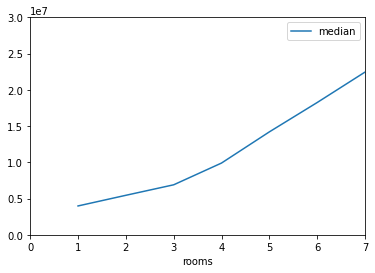

In [134]:
rooms_pivot_table.plot(x='rooms',y='median',kind='line')
plt.xlim(0,7)
plt.ylim(0,3e7)
plt.show()

In [135]:
rooms_pivot_table['rooms'].corr(rooms_pivot_table['median'])

Коэф. корреляции = 0.26, слабая связь цена и количества комнат.
Не смотрим на график при x > 7 (т.к. 12 и меньше строк с таким количеством комнат)

# Тип этажа

In [136]:
type_floor_pivot_table = data.pivot_table(index='floor_type',values='last_price',aggfunc=['count','mean','median']).reset_index()
type_floor_pivot_table.columns = ('floor_type','count','mean','median')
type_floor_pivot_table

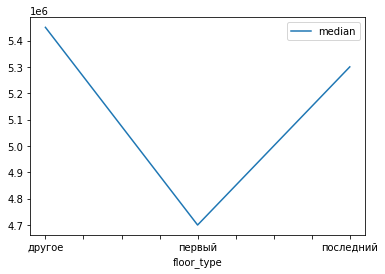

In [137]:
type_floor_pivot_table.plot(x='floor_type',y='median',kind='line')
plt.show()

Из графика видно, что первый этаж не пользуется популярностью, поэтому и стоит дешевле.

# Дата размещения

In [138]:
date_weekday_pivot_table = data.pivot_table(index=['weekday_exposition'],values='last_price',aggfunc=['count','mean','median']).reset_index()
date_weekday_pivot_table.columns = ['weekday_exposition','count', 'mean', 'median']
date_weekday_pivot_table

In [139]:
date_weekday_pivot_table['day'] = [7,2,1,5,3,6,4]
date_weekday_pivot_table = date_weekday_pivot_table.sort_values('day').reset_index(drop=True)

In [140]:
date_weekday_pivot_table

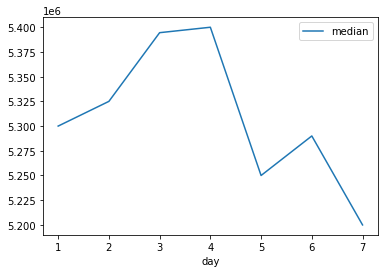

In [141]:
date_weekday_pivot_table.plot(x='day',y='median')
plt.show()

Во-первых, из таблицы видно, что по выходным выкладывают меньше объявлений. </br>
В нашей выборке квартиры, выставленные в пятницу,субботу,воскресенье, стоят меньше

In [142]:
date_month_pivot_table = data.pivot_table(index=['month_exposition'],values='last_price',aggfunc=['count','mean','median']).reset_index()
date_month_pivot_table.columns = ['month_exposition','count', 'mean', 'median']
date_month_pivot_table

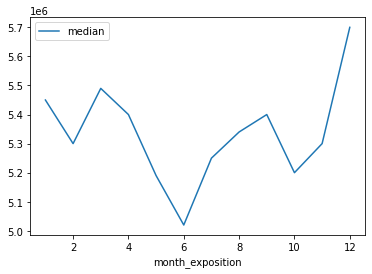

In [143]:
date_month_pivot_table.plot(x='month_exposition',y='median')
plt.show()

Спад цен на квартиры выставленные в 6 и 10 месяцы.</br>
Прирост в 12 месяц. </br>
Поскольку в нашей выборке объявления за 5 лет, можно говорить о влиянии сезона на цену.

In [144]:
date_year_pivot_table = data.pivot_table(index=['year_exposition'],values='last_price',aggfunc=['count','mean','median']).reset_index()
date_year_pivot_table.columns = ['year_exposition','count', 'mean', 'median']
date_year_pivot_table

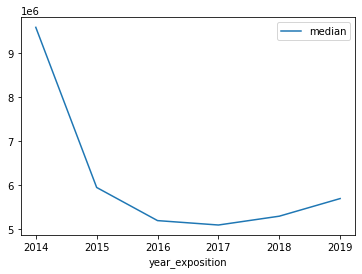

In [145]:
date_year_pivot_table.plot(x='year_exposition',y='median')
plt.show()

Сильное понижение цен в 2015 году.(Стоит отметить, что лишь 114 квартир в нашей выборке выставляли в 2014 году).
После 2017 плавное повышение.

# 4.4
# Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name.

In [146]:
price_per_meter = data.groupby('locality_name').agg('count').sort_values('total_images',ascending=False).reset_index().head(10)
list_for_meter = price_per_meter['locality_name']
list_for_meter

In [147]:
price_per_meter = data.query('locality_name in @list_for_meter'). \
                    groupby('locality_name'). \
                    agg({'price_per_square_meter':['median','mean','count'], \
                         'cityCenters_nearest':'median',})

price_per_meter.columns = ['median','mean','count','cityCenters_nearest']
price_per_meter.sort_values('median',ascending=False)

<div class="alert alert-info">
Самая большая цена квадратного метра в Санкт-Петербурге. Далее идут Пушкин и Сестрорецк, хотя поселок Парголово находится ближе, чем Пушкин и Сестрорецк. Цена также будет зависить от типа населённого пункта.
    
</div>

# 4.5 Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.

In [148]:
price_per_km = data.query('locality_name == "Санкт-Петербург"'). \
                pivot_table(index='cityCenters_km',values='last_price',aggfunc=['count','mean','median'])
price_per_km.columns = ['count','mean','median']
price_per_km = price_per_km.reset_index()
price_per_km['mean'] = price_per_km['mean'].round(0)
price_per_km

In [149]:
price_per_km['median'].corr(price_per_km['cityCenters_km'])

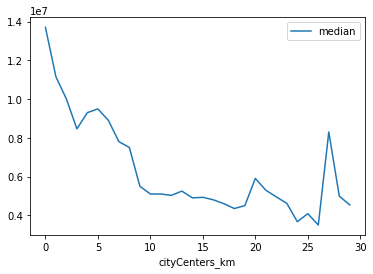

In [150]:
price_per_km.plot(x='cityCenters_km',y='median')
plt.show()

Видно резкое понижение цен при удалённости от центра.
Коэф. корреляции = -0.75 - высокая зависимость.
Скачок при cityCenters_km = 27, но там лишь 2 строки, значения нерелевантны.
Небольшой скачок цен при cityCenters_km = 5, должно быть связано с географией города.


# Шаг 5. Напишите общий вывод

Провели предобработку данных, было очень много пропусков в столбцах. Пришлось удалить весь столбец с расстоянием до парка. </br>
Добавили новые столбцы: Цена за квадратный метр квартиры, расстояние до центра города в км, день/месяц/год подачи объявления, тип этажа(последний/другой/последний)
Изучая данные, я заметил сильное понижение цен на квартиры с 2015 года. 
Плавное повышение с 2017.</br>
Конечно же, стоимость квартиры зависит от её площади.
Выяснил, что в продажах есть сезонность. Пониженные цены на квартиры, выставленные в июне и октябре. Также значительный рост на цены в декабре. </br>
Сильная зависимость цены от расстояния до центра города. Чем ближе, тем дороже. </br>
Дешевле всего стоят квартиры, находящиеся на первом этаже. </br>
Нормальное время продажи квартиры, судя по диаграмме размаха, составляет до 500 дней. </br>
